In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
meal = pd.read_csv('meal_info.csv')
ful = pd.read_csv('fulfilment_center_info.csv')
sub = pd.read_csv('sample_submission (1).csv')

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [19]:
train.isnull().sum().sum()

0

In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [8]:
test.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000


In [20]:
test.isnull().sum().sum()

0

In [9]:
sub.head()

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


In [10]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          32573 non-null  int64
 1   num_orders  32573 non-null  int64
dtypes: int64(2)
memory usage: 509.1 KB


In [11]:
sub.describe()

,id,num_orders
count,3.257300e+04,32573.0
mean,1.248476e+06,0.0
std,1.441580e+05,0.0
min,1.000085e+06,0.0
25%,1.123969e+06,0.0
50%,1.247296e+06,0.0
75%,1.372971e+06,0.0
max,1.499996e+06,0.0


In [12]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [13]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [14]:
meal.describe()

,meal_id
count,51.000000
mean,2013.921569
std,553.633555
min,1062.000000
25%,1550.500000
50%,1971.000000
75%,2516.500000
max,2956.000000


In [15]:
ful.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [16]:
ful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [17]:
ful.describe()

,center_id,city_code,region_code,op_area
count,77.000000,77.000000,77.000000,77.000000
mean,83.142857,600.662338,56.493506,3.985714
std,46.090219,66.720274,18.126473,1.106406
min,10.000000,456.000000,23.000000,0.900000
25%,50.000000,553.000000,34.000000,3.500000
50%,77.000000,596.000000,56.000000,3.900000
75%,110.000000,651.000000,77.000000,4.400000
max,186.000000,713.000000,93.000000,7.000000


In [18]:
print('train shape',train.shape)
print('test shape',test.shape)
print('meal shape',meal.shape)
print('fulfillment shape',ful.shape)

train shape (456548, 9)
test shape (32573, 8)
meal shape (51, 3)
fulfillment shape (77, 5)


In [25]:
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train,test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (489121, 9)


In [32]:
data = pd.merge(all_data, meal, on="meal_id", how="outer")
data = pd.merge(data, ful, on="center_id", how="outer")
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96.0,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163.0,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215.0,Beverages,Thai,647,56,TYPE_C,2.0


In [33]:
train = data[:ntrain].copy()
test = data[:ntest].copy()

In [34]:
train.shape,test.shape

((456548, 15), (32573, 15))

In [35]:
train.drop(columns=["center_id","meal_id"],inplace=True)
test.drop(columns=["center_id","meal_id"],inplace=True)

In [36]:
train.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96.0,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163.0,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215.0,Beverages,Thai,647,56,TYPE_C,2.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


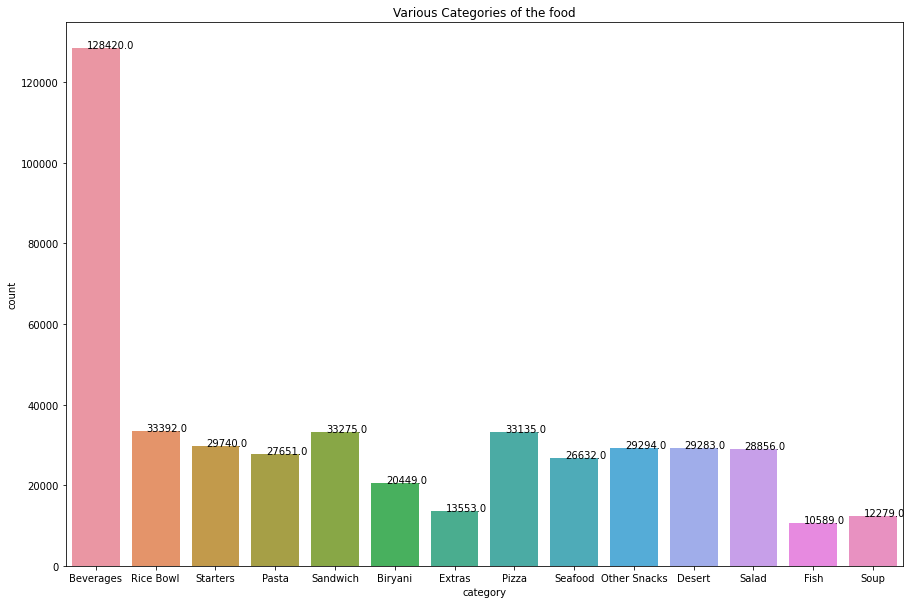

In [37]:
plt.figure(figsize=(15,10))
ax = sns.countplot(train['category'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Various Categories of the food")    
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


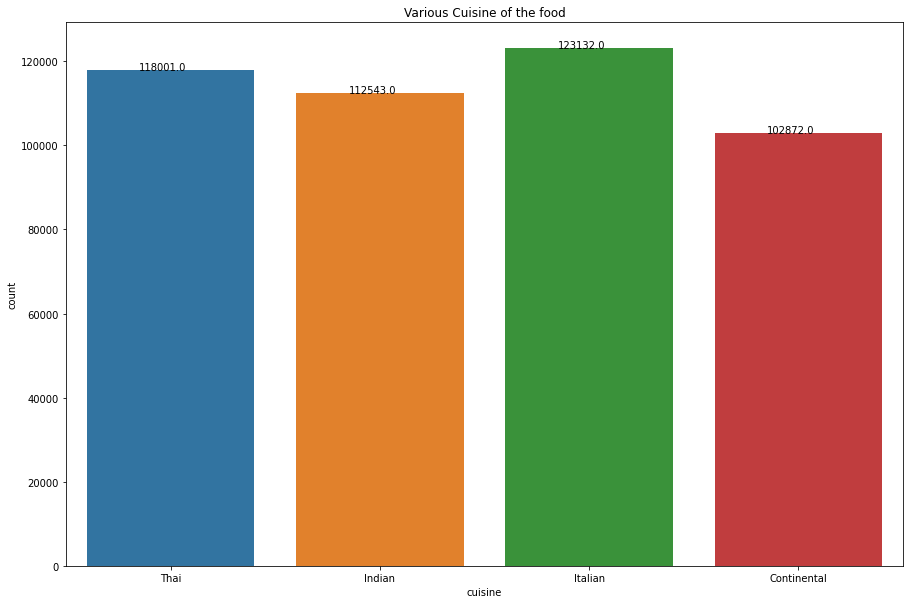

In [38]:
plt.figure(figsize=(15,10))
ax = sns.countplot(train['cuisine'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Various Cuisine of the food")    
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


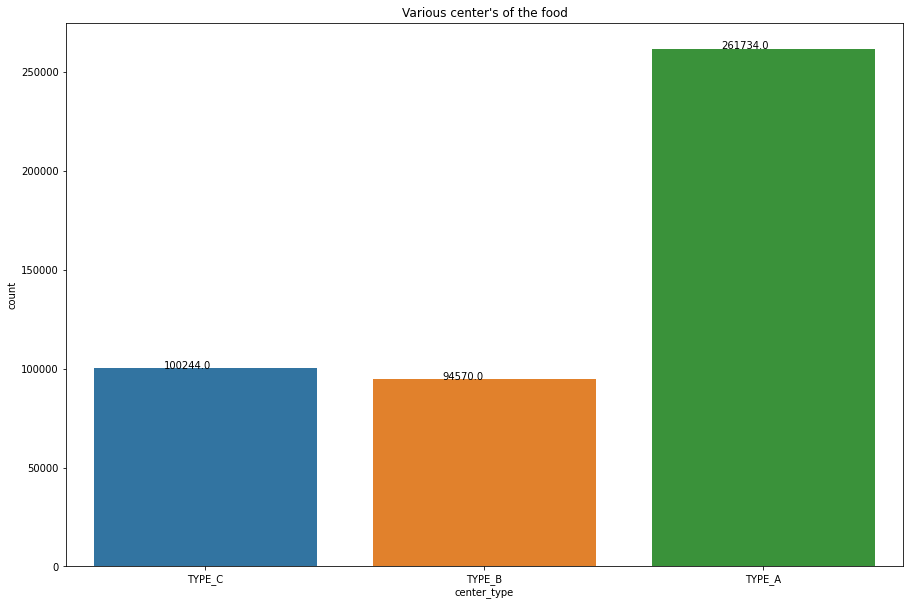

In [40]:
plt.figure(figsize=(15,10))
ax = sns.countplot(train['center_type'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Various center's of the food")    
plt.show()

In [41]:
train.groupby(['category'])['checkout_price'].sum().sort_values()

category
Extras          2.350988e+06
Soup            2.712344e+06
Fish            6.183212e+06
Other Snacks    7.596865e+06
Starters        8.346248e+06
Salad           8.413687e+06
Biryani         9.210821e+06
Sandwich        9.685483e+06
Rice Bowl       1.061212e+07
Pasta           1.093675e+07
Desert          1.281527e+07
Seafood         1.634428e+07
Pizza           1.925620e+07
Beverages       2.733792e+07
Name: checkout_price, dtype: float64

In [43]:
train.groupby(['category'])['base_price'].sum().sort_values()

category
Extras          2.771315e+06
Soup            2.806541e+06
Fish            6.352518e+06
Other Snacks    8.046001e+06
Starters        8.512638e+06
Salad           8.675847e+06
Biryani         9.422309e+06
Sandwich        1.020617e+07
Rice Bowl       1.133514e+07
Pasta           1.182643e+07
Desert          1.366664e+07
Seafood         1.780749e+07
Pizza           2.111673e+07
Beverages       2.901981e+07
Name: base_price, dtype: float64

In [44]:
train['bc_price'] = train['base_price'] - train['checkout_price']
test['bc_price'] = test['base_price'] - test['checkout_price']

In [45]:
train.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,bc_price
0,1379560,1,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0,15.46
1,1018704,2,135.83,152.29,0,0,323.0,Beverages,Thai,647,56,TYPE_C,2.0,16.46
2,1196273,3,132.92,133.92,0,0,96.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00
3,1116527,4,135.86,134.86,0,0,163.0,Beverages,Thai,647,56,TYPE_C,2.0,-1.00
4,1343872,5,146.50,147.50,0,0,215.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00


In [51]:
train['bp_price'] = (train['base_price'] - train['checkout_price']) / train['base_price']
test['bp_price'] = (test['base_price'] - test['checkout_price']) / test['base_price'] 

In [52]:
train.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,bc_price,bp_price
0,1379560,1,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0,0.101517,0.101517
1,1018704,2,135.83,152.29,0,0,323.0,Beverages,Thai,647,56,TYPE_C,2.0,0.108083,0.108083
2,1196273,3,132.92,133.92,0,0,96.0,Beverages,Thai,647,56,TYPE_C,2.0,0.007467,0.007467
3,1116527,4,135.86,134.86,0,0,163.0,Beverages,Thai,647,56,TYPE_C,2.0,-0.007415,-0.007415
4,1343872,5,146.50,147.50,0,0,215.0,Beverages,Thai,647,56,TYPE_C,2.0,0.006780,0.006780


In [53]:
train.groupby(['center_type'])['bc_price'].sum().sort_values()

center_type
TYPE_B     5013.845470
TYPE_C     5954.846791
TYPE_A    14668.907249
Name: bc_price, dtype: float64

In [54]:
train.groupby(['cuisine'])['bc_price'].sum().sort_values()

cuisine
Thai           5204.963252
Italian        5781.649426
Continental    6612.931695
Indian         8038.055137
Name: bc_price, dtype: float64

In [55]:
train.groupby(['center_type'])['bp_price'].sum().sort_values()

center_type
TYPE_B     5013.845470
TYPE_C     5954.846791
TYPE_A    14668.907249
Name: bp_price, dtype: float64

In [56]:
train.groupby(['cuisine'])['bp_price'].sum().sort_values()

cuisine
Thai           5204.963252
Italian        5781.649426
Continental    6612.931695
Indian         8038.055137
Name: bp_price, dtype: float64

In [60]:
train.groupby(['category'])['bp_price'].sum().sort_values()

category
Fish             271.949152
Soup             369.857130
Biryani          452.602408
Starters         579.432171
Salad            875.798276
Other Snacks    1607.464227
Sandwich        1698.698847
Desert          1793.117693
Extras          1810.703659
Seafood         2152.001456
Pasta           2162.856474
Rice Bowl       2188.249115
Pizza           2841.841532
Beverages       6833.027369
Name: bp_price, dtype: float64

In [59]:
train.groupby(['city_code'])['bp_price'].sum().sort_values()

city_code
698      26.916881
693     275.632587
541     279.625699
702     285.577110
553     286.254655
461     301.356360
632     302.886037
556     306.272258
515     312.690111
651     312.960652
649     313.140988
628     314.388178
478     315.156406
676     315.542220
683     316.509302
615     318.145474
648     319.580194
609     319.637230
680     320.002323
658     320.421190
602     320.564506
562     324.896198
485     325.130225
620     327.122963
561     328.708764
695     329.162630
659     339.794171
675     353.374777
599     397.964518
596     407.126859
679     408.438865
577     409.282283
685     410.147645
456     413.171285
699     417.059475
579     418.426257
654     419.208633
703     447.014207
700     447.289389
713     456.044697
576     628.318687
593     664.624041
614     715.547905
647     793.646664
517     850.755502
638     864.563248
522     867.799217
604     934.473513
526    2343.258350
590    3411.988181
Name: bp_price, dtype: float64

In [61]:
train.groupby(['region_code'])['bp_price'].sum().sort_values()

region_code
23       26.916881
35      285.577110
93      319.637230
71      407.126859
85     1588.652077
77     5086.789275
34     6112.221370
56    11810.678707
Name: bp_price, dtype: float64

In [62]:
from sklearn.compose import make_column_selector as selector
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(train)
categorical_columns

['category', 'cuisine', 'center_type']

In [63]:
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat((train,test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (489121, 15)


In [64]:
all_data.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,bc_price,bp_price
0,1379560,1,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0,0.101517,0.101517
1,1018704,2,135.83,152.29,0,0,323.0,Beverages,Thai,647,56,TYPE_C,2.0,0.108083,0.108083
2,1196273,3,132.92,133.92,0,0,96.0,Beverages,Thai,647,56,TYPE_C,2.0,0.007467,0.007467
3,1116527,4,135.86,134.86,0,0,163.0,Beverages,Thai,647,56,TYPE_C,2.0,-0.007415,-0.007415
4,1343872,5,146.50,147.50,0,0,215.0,Beverages,Thai,647,56,TYPE_C,2.0,0.006780,0.006780


In [65]:
import category_encoders as ce
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data, all_data['num_orders'], test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape
ord_enc = ce.OrdinalEncoder(cols=['category', 'cuisine', 'center_type']).fit(X_train,y_train)
data = ord_enc.transform(all_data)
data.head()
main_cols =data.columns.difference(['num_orders'])

In [66]:
train = data[:ntrain].copy()
#train.drop_duplicates(inplace = True, ignore_index=True)
target = train.num_orders.copy()
train.drop(['num_orders','id'] ,axis=1, inplace=True)

test = data[ntrain:].copy()
test.drop(['num_orders','id'] ,axis=1, inplace=True)
test = test.reset_index(drop=True)

In [67]:
target = target.fillna(target.mean())

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.30)

In [69]:
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val) 
y_pred[y_pred<0] = 0 
from sklearn import metrics 
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 77.26954263059325


In [78]:
filename = 'Food-demand-Forecasting-model-XG.pkl'
pickle.dump(XG, open(filename, 'wb'))

In [70]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train) 
y_pred = LR.predict(X_val) 
y_pred[y_pred<0] = 0 
from sklearn import metrics 
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 149.04310170803637


In [77]:
filename = 'Food-demand-Forecasting-model-LR.pkl'
pickle.dump(LR, open(filename, 'wb'))

In [71]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 69.08499843925817


In [76]:
filename = 'Food-demand-Forecasting-model-DTR.pkl'
pickle.dump(DT, open(filename, 'wb'))

In [72]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 70.98905760097333


In [74]:
import pickle
filename = 'Food-demand-Forecasting-model-Knn.pkl'
pickle.dump(KNN, open(filename, 'wb'))
#pickle.dump(XB, open(filename, 'wb'))

In [73]:
from sklearn.ensemble import RandomForestRegressor

RFR= RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 53.57926626160761


In [75]:
filename = 'Food-demand-Forecasting-model-RFR.pkl'
pickle.dump(RFR, open(filename, 'wb'))

In [85]:
print(y_train)

434069     54.0
335461    729.0
169849    231.0
27814     393.0
275975    595.0
          ...  
379639    177.0
289914    541.0
342802     95.0
85806      95.0
298440    134.0
Name: num_orders, Length: 319583, dtype: float64


In [79]:
preds = RFR.predict(test)

In [82]:
print(X_train)

        week  checkout_price  base_price  emailer_for_promotion  \
434069   129          426.80      507.31                      0   
335461    12          183.36      184.36                      0   
169849    29          244.50      242.50                      0   
27814      9          260.93      260.93                      0   
275975    92          120.31      121.28                      0   
...      ...             ...         ...                    ...   
379639    63          215.37      215.37                      0   
289914   115          296.82      298.82                      0   
342802   133          155.20      175.57                      0   
85806     82          680.03      680.03                      0   
298440   117          535.44      639.23                      1   

        homepage_featured  category  cuisine  city_code  region_code  \
434069                  0         9        4        526           34   
335461                  0         4        4       

In [80]:
preds

array([ 205.5 ,  270.2 ,  124.06, ..., 1311.9 , 1331.89,  894.  ])